In [2]:
import pandas as pd
import numpy as np



In [135]:
data = pd.read_csv("data.csv")
data

FileNotFoundError: File b'data.csv' does not exist

In [3]:
sampleTime = pd.read_csv("input/SAMPLE TIME.csv", ";",  skiprows=[1], low_memory=False)
sampleY = pd.read_csv("input/SAMPLE Y.csv", ";",  skiprows=[1], low_memory=False)
blankTime = pd.read_csv("input/BLANK TIME.csv", ";",  skiprows=[1], low_memory=False)
blankY = pd.read_csv("input/BLANK Y.csv", ";",  skiprows=[1], low_memory=False)

In [4]:
sampleData = pd.concat([sampleTime['Sample 1'], sampleY['Sample 1']],  axis=1)
blankData = pd.concat([blankTime['Sample 1'], blankY['Sample 1']], axis=1)
sampleData.columns=['time', 'intensity']
blankData.columns = ['time', 'intensity']

In [5]:
sampleData

,time,intensity
0,0.01743,10004.001601
1,0.01754,0.000000
2,0.01765,0.000000
3,0.01776,0.000000
4,0.01786,0.000000
5,0.01797,0.000000
6,0.01808,0.000000
7,0.01819,0.000000
8,0.01829,0.000000
9,0.01840,0.000000


In [6]:
max = sampleData['time'].max()
min = sampleData['time'].min()
bins100=[]
bins1000=[]
for i in range (0, 101):
    bins100.append(min + i*(max-min)/100)
    
    
for i in range (0, 1001):
    bins1000.append(min + i*(max-min)/1000)
    

#sampleData.apply(pd.Series.value_counts, bins)

In [7]:
sampleData['time_bin_100']  = pd.cut(sampleData['time'],bins=bins100,labels=bins100[:-1],include_lowest=True)


sampleData['time_bin_1000']  = pd.cut(sampleData['time'],bins=bins1000,labels=bins1000[:-1],include_lowest=True)




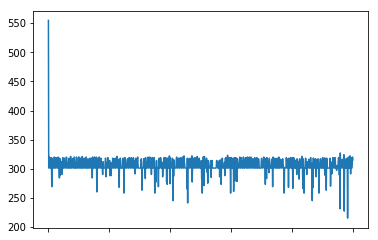

In [14]:
import matplotlib
values = pd.value_counts(sampleData["time_bin_1000"], sort=False)

fig = values.plot().get_figure()
fig.savefig('figure.pdf')

In [4]:
ionBlankThreshold = data['INTENSITY\n(cps)'].mean()


ionThreashold = 9550
ionBlankThreshold

1250.5

In [5]:
def calcIonIntensity (row):
    intensity =  row['INTENSITY\n(cps).1']
    if intensity == "" or intensity > ionThreashold :
        return np.nan
    else:
        if intensity > ionBlankThreshold :
            return intensity
    return 0

data['Ion_Intensity'] = data.apply (lambda row: calcIonIntensity (row),axis=1)


data


,TIME (s),INTENSITY (cps),TIME (s).1,INTENSITY (cps).1,Ion_Intensity
0,0.0174,10004,0.0174,8004,8004.0
1,0.0175,0,0.0175,0,0.0
2,0.0177,0,0.0177,0,0.0
3,0.0178,0,0.0178,0,0.0
4,0.0179,0,0.0179,6660,6660.0
5,0.0180,0,0.0180,0,0.0
6,0.0181,0,0.0181,0,0.0
7,0.0182,0,0.0182,11110,NaN
8,0.0183,0,0.0183,0,0.0
9,0.0184,0,0.0184,0,0.0


In [6]:
ionIntensityAvg = data['Ion_Intensity'].mean()


def calcBlankSubstracted (row):
    intensity =  row['INTENSITY\n(cps).1']
    if(intensity > ionThreashold):
        return intensity - ionIntensityAvg
    return np.nan

data['Ion_Blank_Substracted'] = data.apply (lambda row: calcBlankSubstracted (row),axis=1)


data

,TIME (s),INTENSITY (cps),TIME (s).1,INTENSITY (cps).1,Ion_Intensity,Ion_Blank_Substracted
0,0.0174,10004,0.0174,8004,8004.0,NaN
1,0.0175,0,0.0175,0,0.0,NaN
2,0.0177,0,0.0177,0,0.0,NaN
3,0.0178,0,0.0178,0,0.0,NaN
4,0.0179,0,0.0179,6660,6660.0,NaN
5,0.0180,0,0.0180,0,0.0,NaN
6,0.0181,0,0.0181,0,0.0,NaN
7,0.0182,0,0.0182,11110,NaN,10062.571429
8,0.0183,0,0.0183,0,0.0,NaN
9,0.0184,0,0.0184,0,0.0,NaN


In [12]:
dt =0.10
ds =2100
sf= 0.02
ne= 11
    
def calcBlankSubstracted (row):
    
    intensity =  row['Ion_Blank_Substracted']
    if(intensity != np.nan):
        return  intensity * dt/1000/ds*sf*ne/60*10000
    return np.nan


data['Element_Mass'] = data.apply (lambda row: calcBlankSubstracted (row),axis=1)


data

,TIME (s),INTENSITY (cps),TIME (s).1,INTENSITY (cps).1,Ion_Intensity,Ion_Blank_Substracted,Element_Mass
0,0.0174,10004,0.0174,8004,8004.0,NaN,NaN
1,0.0175,0,0.0175,0,0.0,NaN,NaN
2,0.0177,0,0.0177,0,0.0,NaN,NaN
3,0.0178,0,0.0178,0,0.0,NaN,NaN
4,0.0179,0,0.0179,6660,6660.0,NaN,NaN
5,0.0180,0,0.0180,0,0.0,NaN,NaN
6,0.0181,0,0.0181,0,0.0,NaN,NaN
7,0.0182,0,0.0182,11110,NaN,10062.571429,0.017570
8,0.0183,0,0.0183,0,0.0,NaN,NaN
9,0.0184,0,0.0184,0,0.0,NaN,NaN


In [14]:
cells = []
sum = 0
for a in data['Element_Mass']:
    if not np.isnan(a):
        sum = sum + a
    else:
        if(sum > 0):
            cells.append(sum)
            sum = 0
            
if sum > 0:
    cells.append(sum)
    
detectedCells = len(cells)
massMean = np.mean(cells)
massStd = np.std(cells)
ionicConcentration = ionIntensityAvg / ds

detectedCells, massMean, massStd, ionicConcentration

(2, 0.01660401360544218, 0.0009655555555555563, 0.49877551020408156)